Data Set Information:

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).


Attribute Information:

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets: 
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
2 sex - student's sex (binary: 'F' - female or 'M' - male) 
3 age - student's age (numeric: from 15 to 22) 
4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
16 schoolsup - extra educational support (binary: yes or no) 
17 famsup - family educational support (binary: yes or no) 
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
19 activities - extra-curricular activities (binary: yes or no) 
20 nursery - attended nursery school (binary: yes or no) 
21 higher - wants to take higher education (binary: yes or no) 
22 internet - Internet access at home (binary: yes or no) 
23 romantic - with a romantic relationship (binary: yes or no) 
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
29 health - current health status (numeric: from 1 - very bad to 5 - very good) 
30 absences - number of school absences (numeric: from 0 to 93) 

# these grades are related with the course subject, Math or Portuguese: 
31 G1 - first period grade (numeric: from 0 to 20) 
31 G2 - second period grade (numeric: from 0 to 20) 
32 G3 - final grade (numeric: from 0 to 20, output target)

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

### Importing the data set

In [2]:
df_por=pd.read_csv('student-por.csv', sep=';')
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### Data Exploration

In [3]:
df_por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
df_por.dtypes.unique()

array([dtype('O'), dtype('int64')], dtype=object)

In [5]:
#df_por.info()

In [6]:
numerical=df_por.select_dtypes(include=['number'])
numerical.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13


In [7]:
string=df_por.select_dtypes(include=['object'])
string.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no


### Data quality analysis 
•	Missing values
•	Extremes
•	Distribution of each variable
•	Value transformation (missing values, extremes) 
•	Comments with conclusions



In [8]:
#Missing values
df_por.isnull().sum().sum()

0

In [9]:
#Duplicates
df_por[df_por.duplicated()].shape

(0, 33)

In [10]:
#Distribution of each variable
df_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [11]:
var_range=[]
IQR=[]
var_coef=[]
std=[]
var=[]
mean=[]

for i in range(numerical.shape[1]):
    var_range.append(numerical.iloc[:,i].max()-numerical.iloc[:,i].min())

for i in range(numerical.shape[1]):
    IQR.append(numerical.iloc[:,i].quantile(0.75)-numerical.iloc[:,i].quantile(0.25))
    
for i in range(numerical.shape[1]):
    std.append(numerical.iloc[:,i].std())

for i in range(numerical.shape[1]):
    var.append(numerical.iloc[:,i].var())
    
for i in range(numerical.shape[1]):
    mean.append(numerical.iloc[:,i].mean())

for i in range(numerical.shape[1]):
    var_coef.append(round(numerical.iloc[:,i].std()/numerical.iloc[:,i].mean()*100,3))

data={
    'Varianton range' : var_range,
     'IQR' : IQR,
    'Standard deviation' : std,
    'Variance' : var,
    'Mean' : mean,
    'Variation coefficient' : var_coef
}
index=list(numerical.columns)

Statistical_dispersion=pd.DataFrame(data=data, index=index)
Statistical_dispersion

,Varianton range,IQR,Standard deviation,Variance,Mean,Variation coefficient
age,7,2.0,1.218138,1.483859,16.744222,7.275
Medu,4,2.0,1.134552,1.287208,2.514638,45.118
Fedu,4,2.0,1.099931,1.209848,2.306626,47.686
traveltime,3,1.0,0.748660,0.560492,1.568567,47.729
studytime,3,1.0,0.829510,0.688086,1.930663,42.965
failures,3,0.0,0.593235,0.351928,0.221880,267.368
famrel,4,1.0,0.955717,0.913395,3.930663,24.314
freetime,4,1.0,1.051093,1.104796,3.180277,33.050
goout,4,2.0,1.175766,1.382426,3.184900,36.917
Dalc,4,1.0,0.924834,0.855319,1.502311,61.561


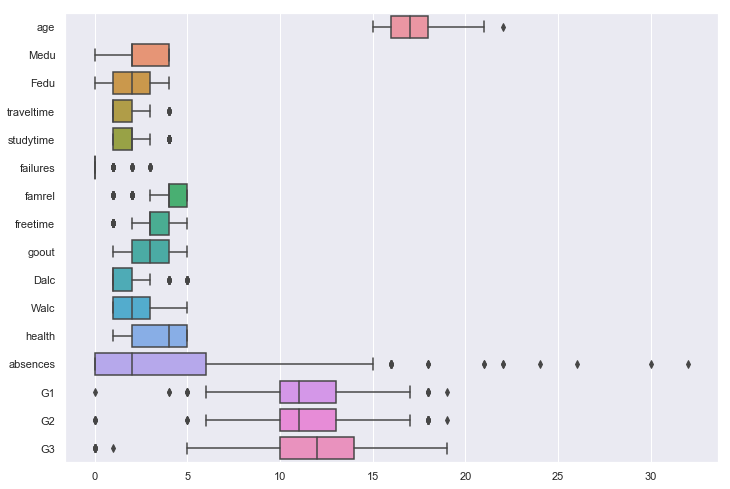

In [12]:
#Outliers
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=df_por, orient="h")

In [13]:
# Frequency

for i in range(df_por.shape[1]):
    print(df_por.iloc[:,i].value_counts())

GP    423
MS    226
Name: school, dtype: int64
F    383
M    266
Name: sex, dtype: int64
17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64
U    452
R    197
Name: address, dtype: int64
GT3    457
LE3    192
Name: famsize, dtype: int64
T    569
A     80
Name: Pstatus, dtype: int64
2    186
4    175
1    143
3    139
0      6
Name: Medu, dtype: int64
2    209
1    174
3    131
4    128
0      7
Name: Fedu, dtype: int64
other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64
other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64
course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64
mother    455
father    153
other      41
Name: guardian, dtype: int64
1    366
2    213
3     54
4     16
Name: traveltime, dtype: int64
2    305
1    212
3     97
4     35
Name: studytime, dtype: int64
0    549
1  

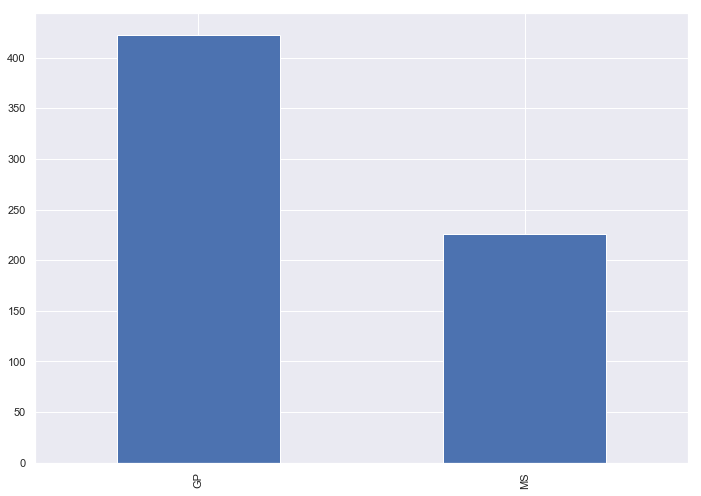

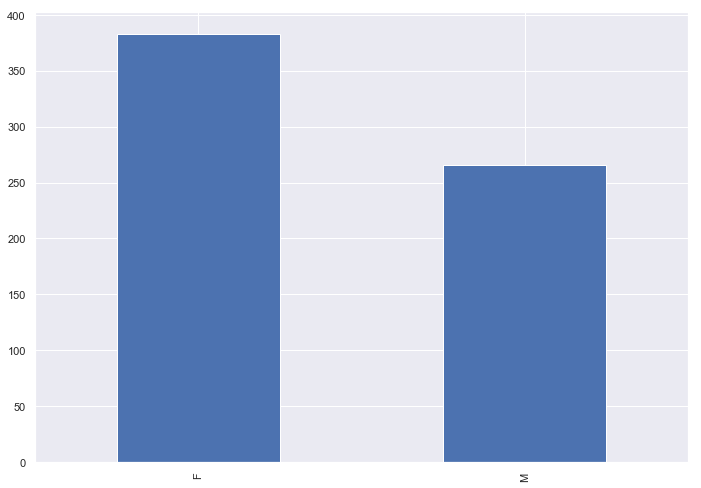

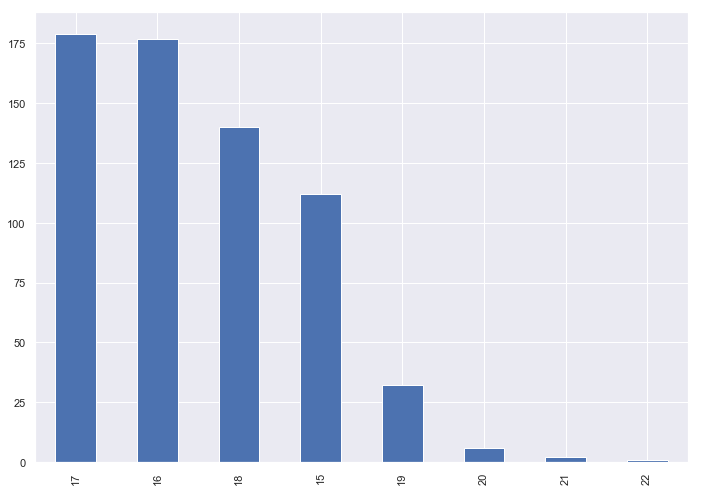

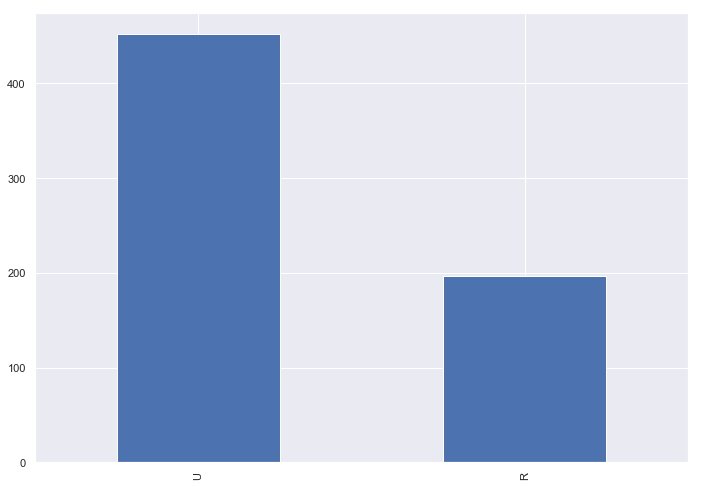

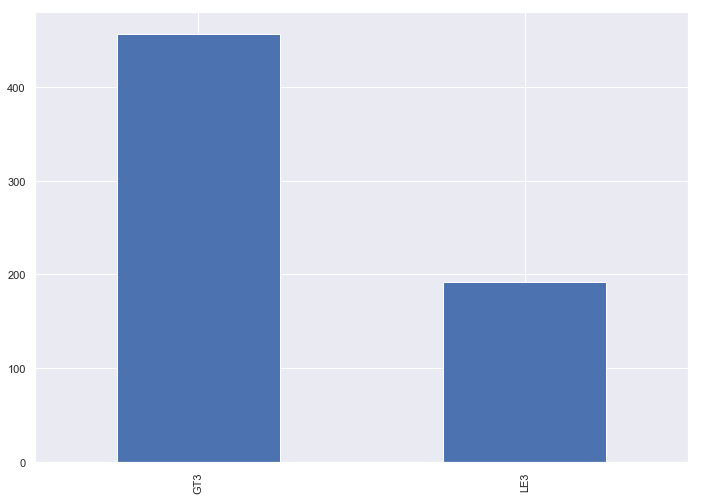

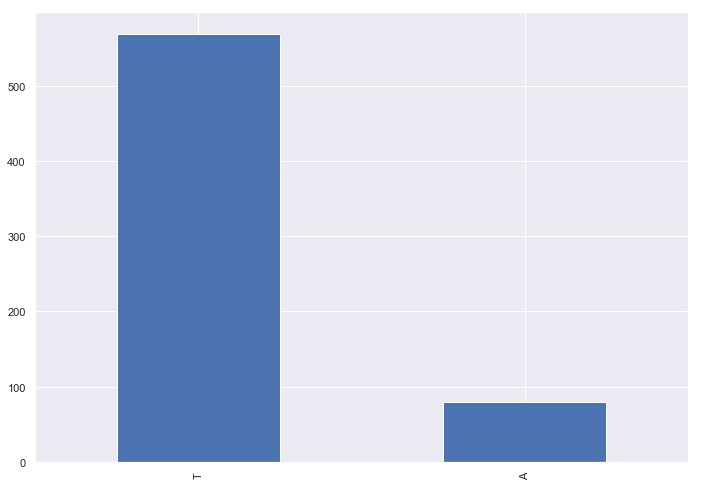

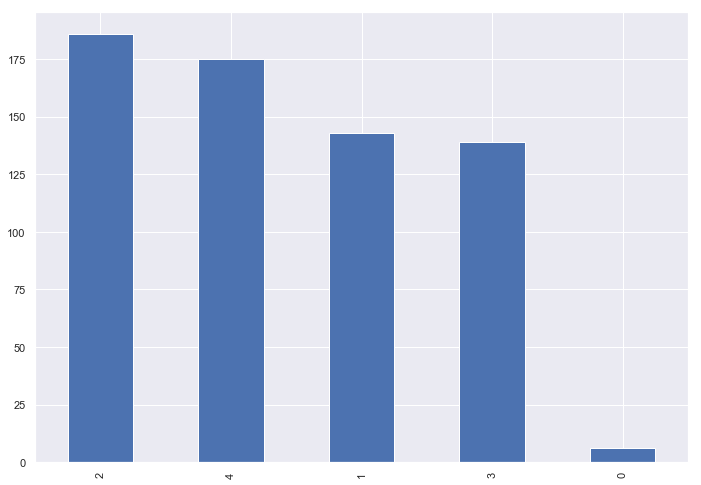

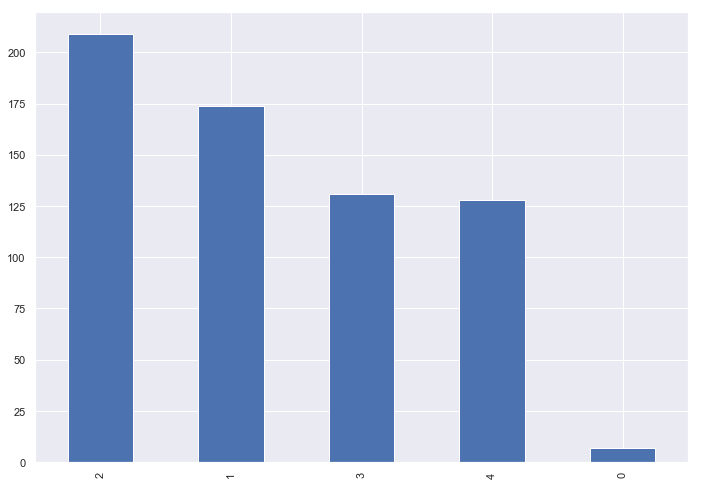

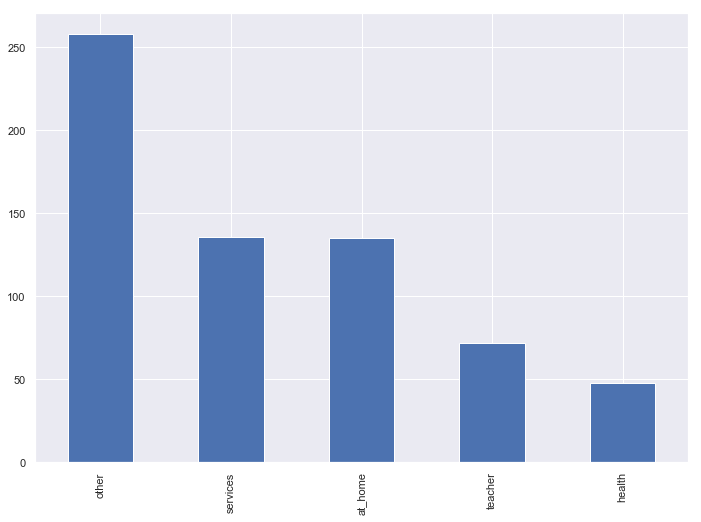

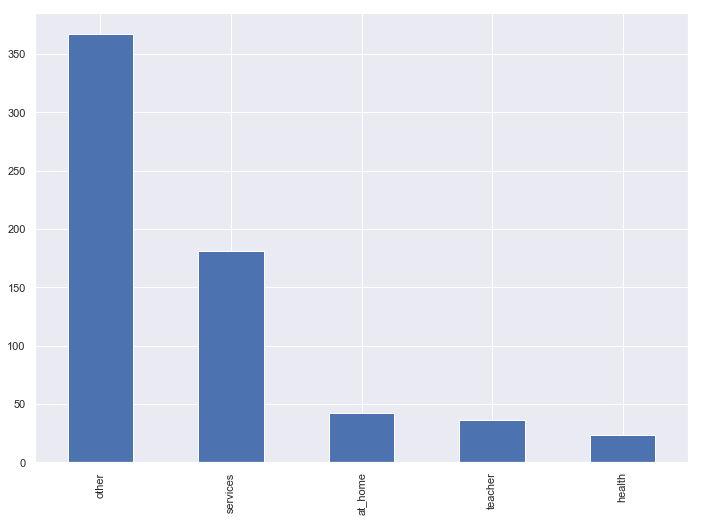

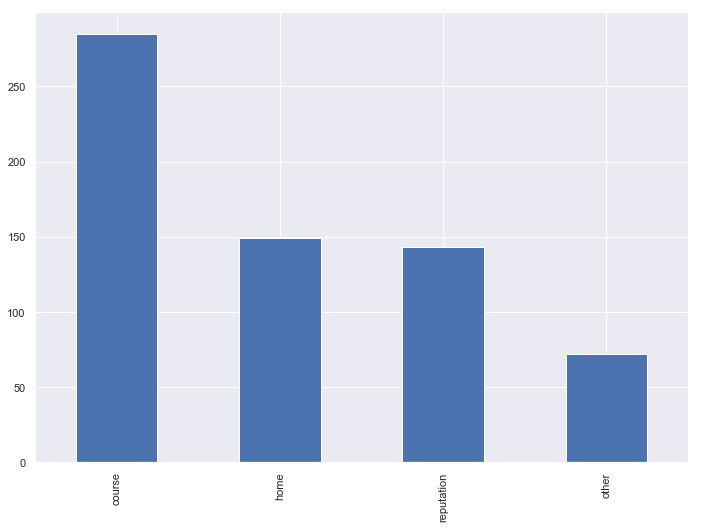

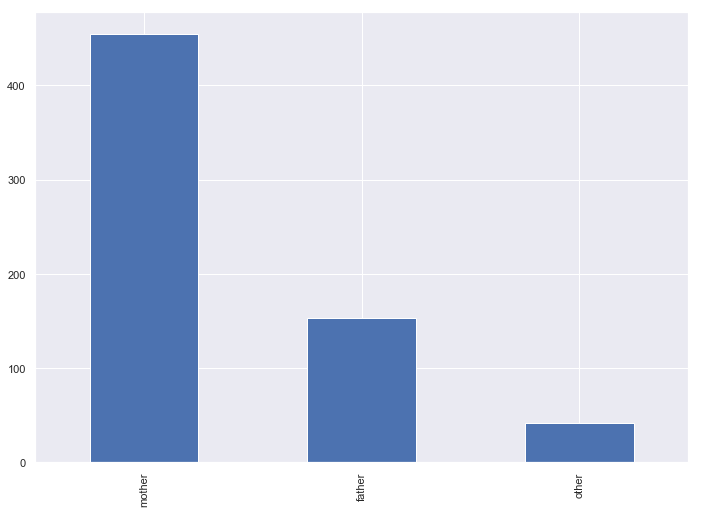

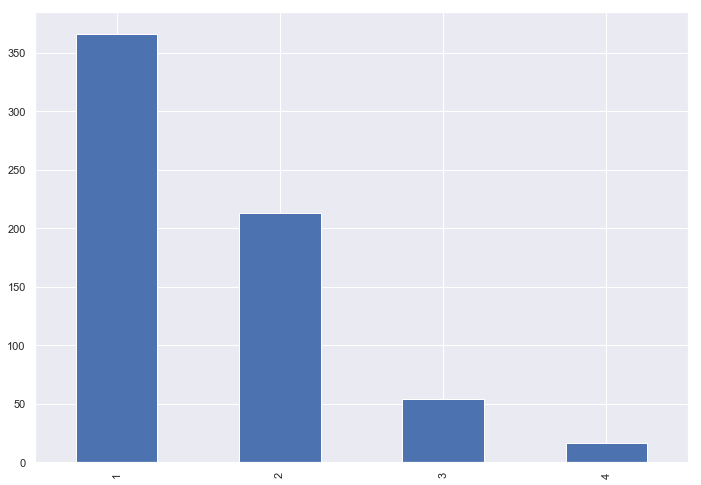

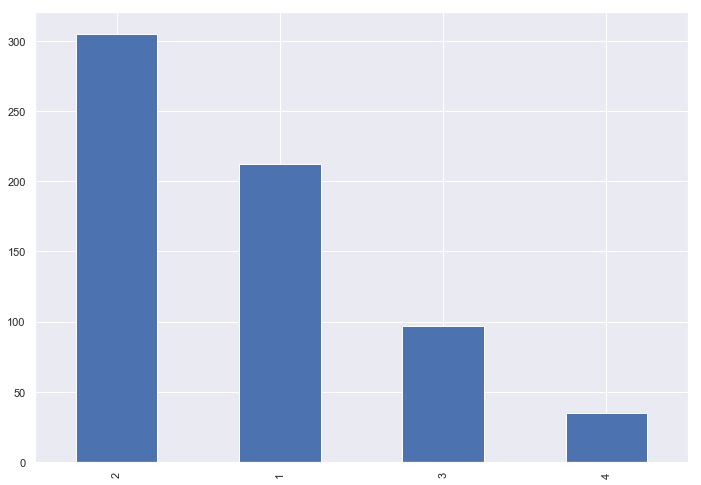

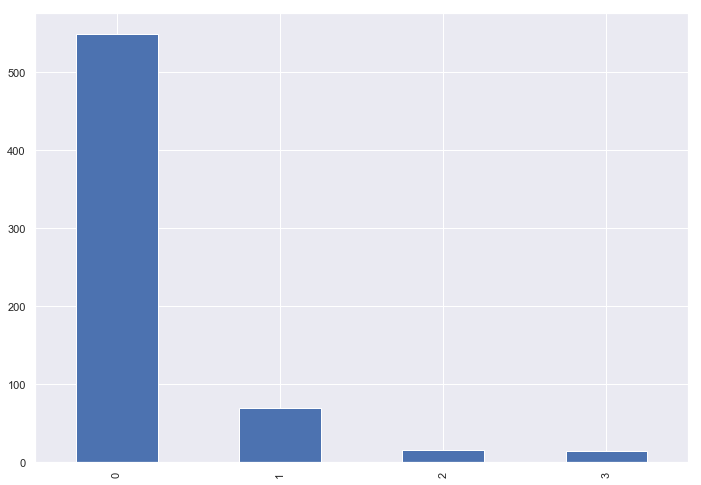

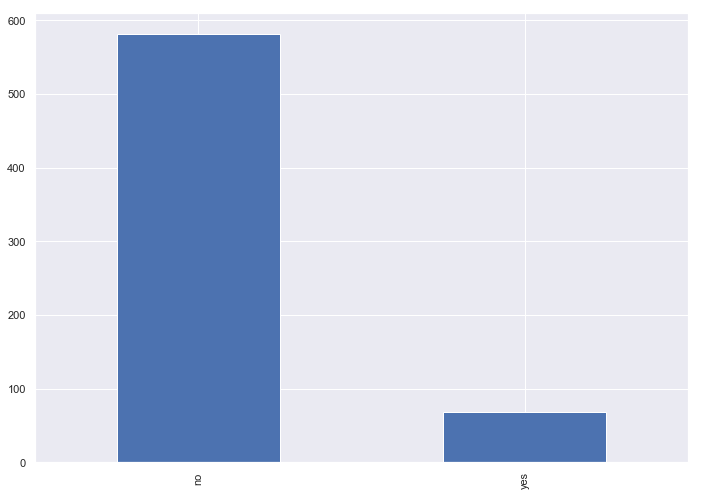

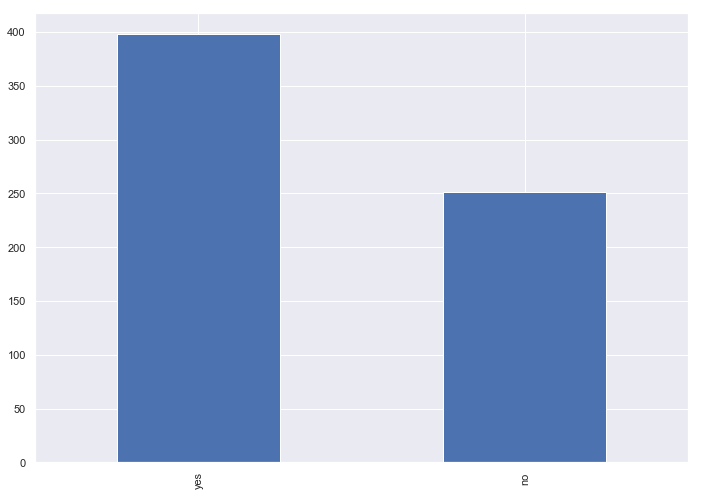

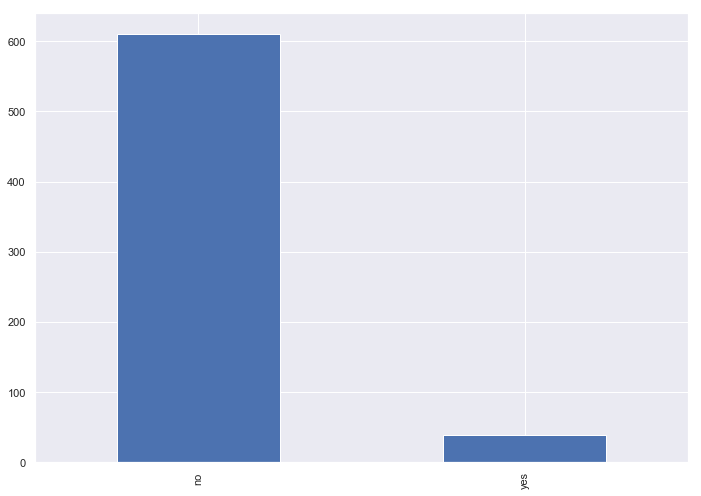

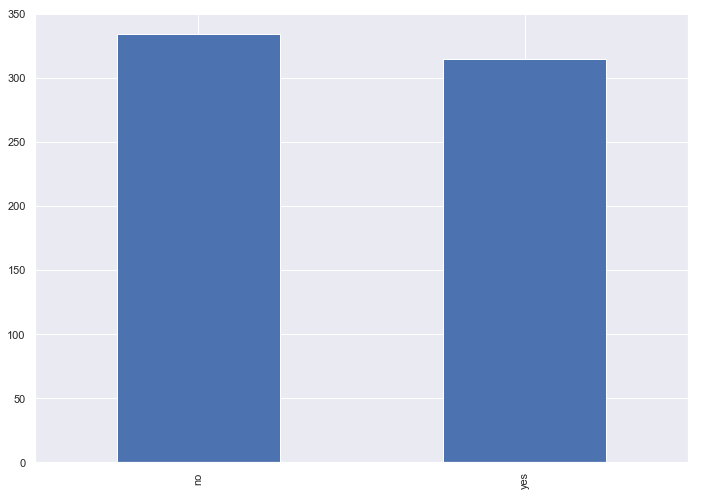

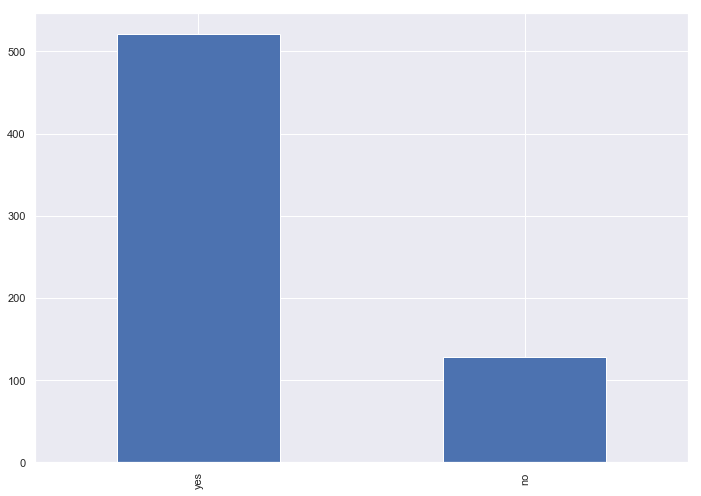

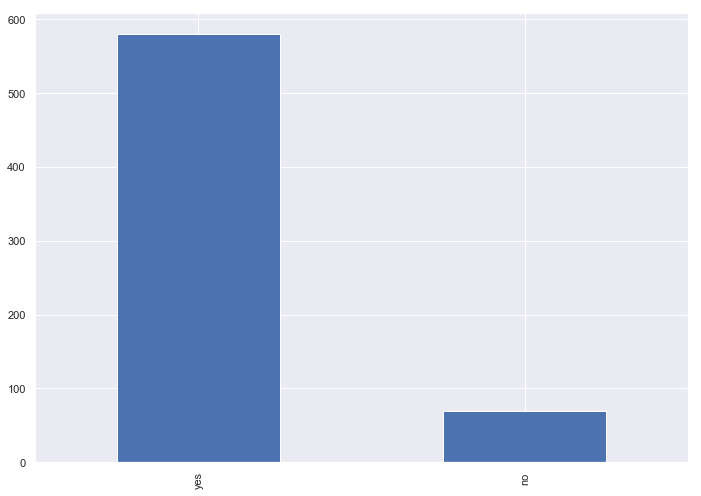

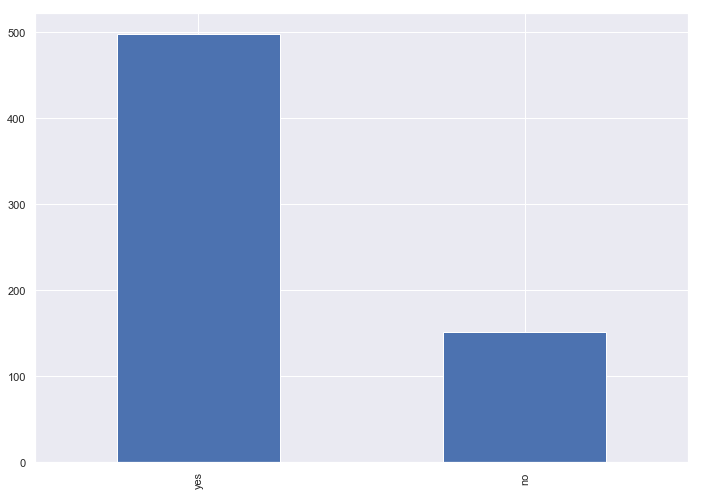

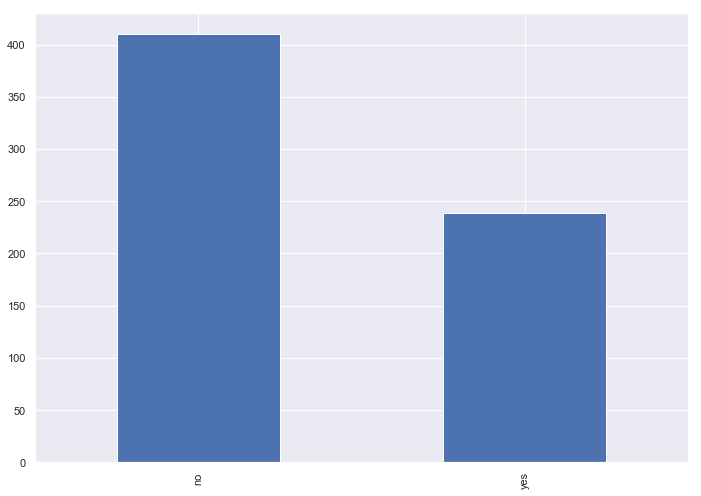

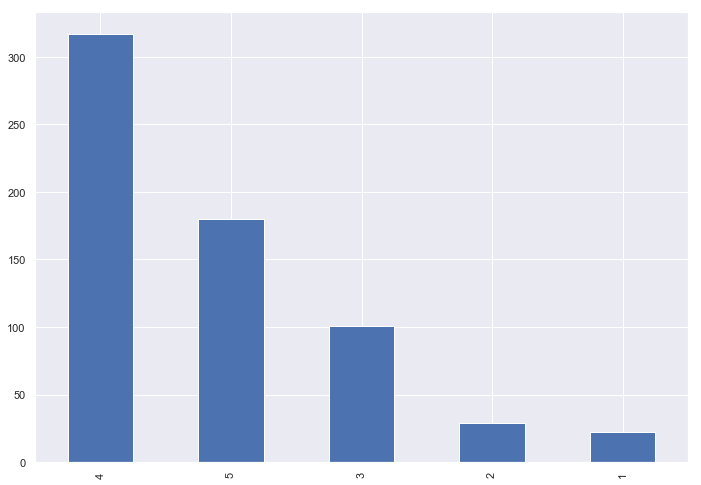

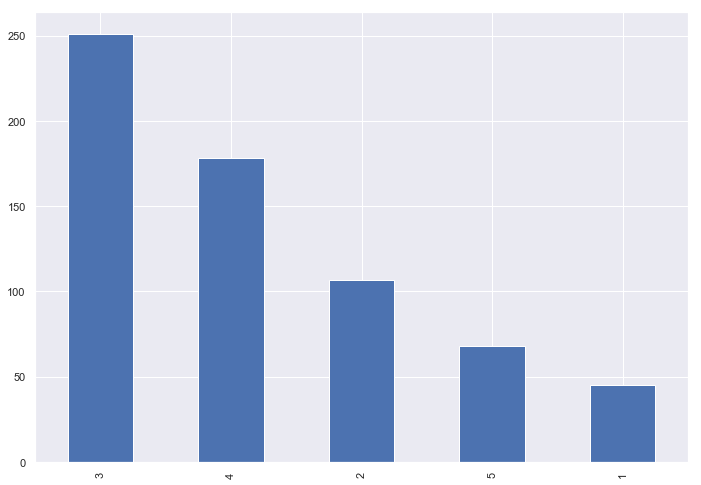

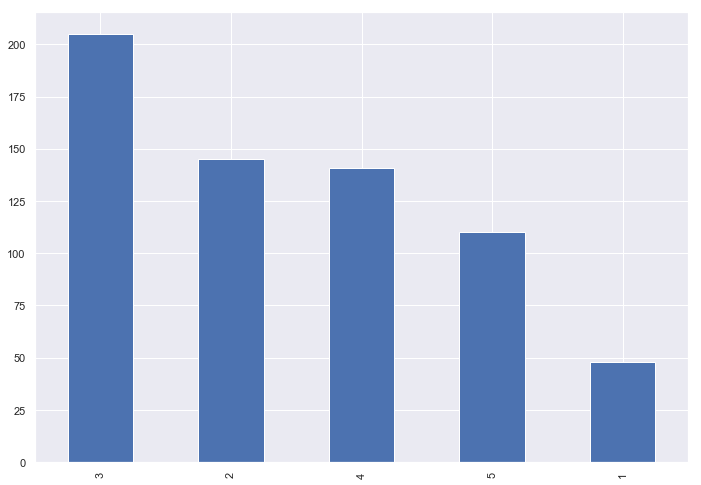

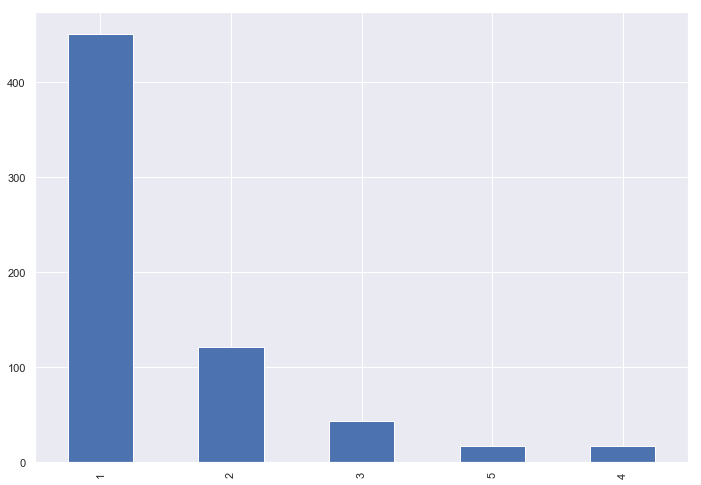

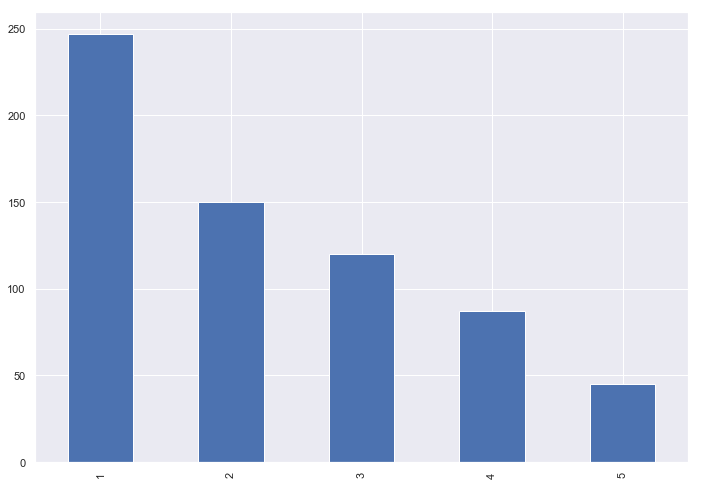

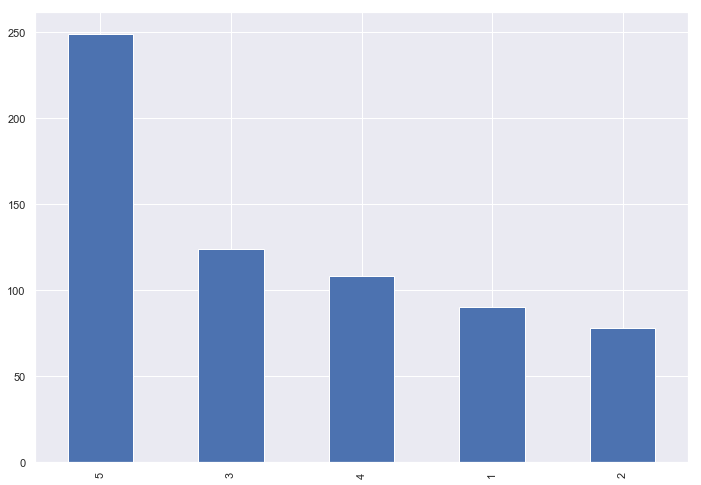

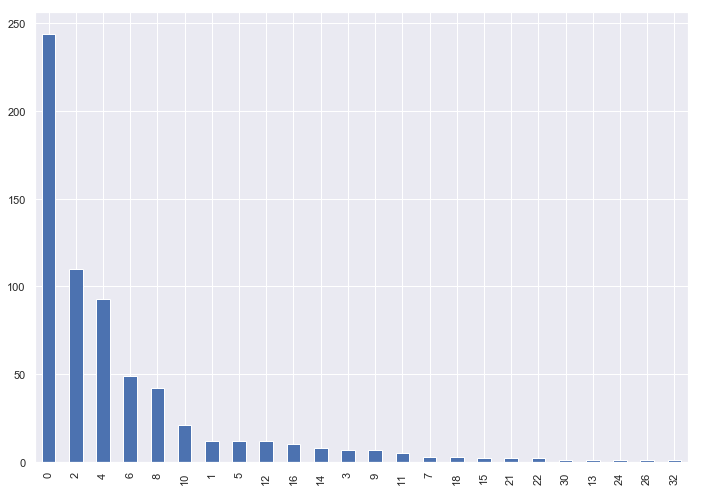

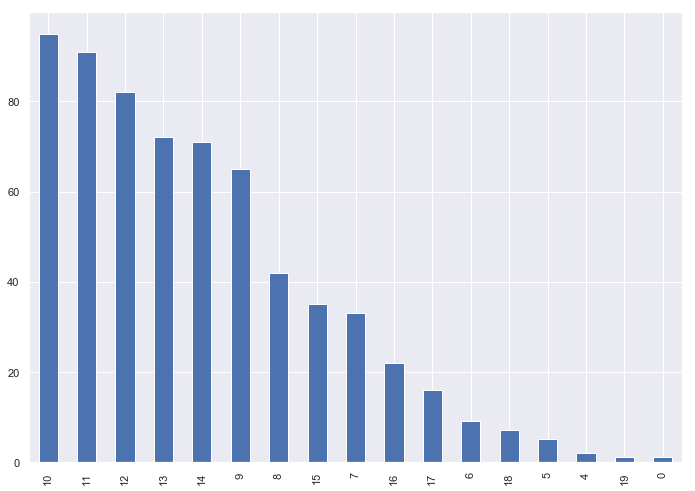

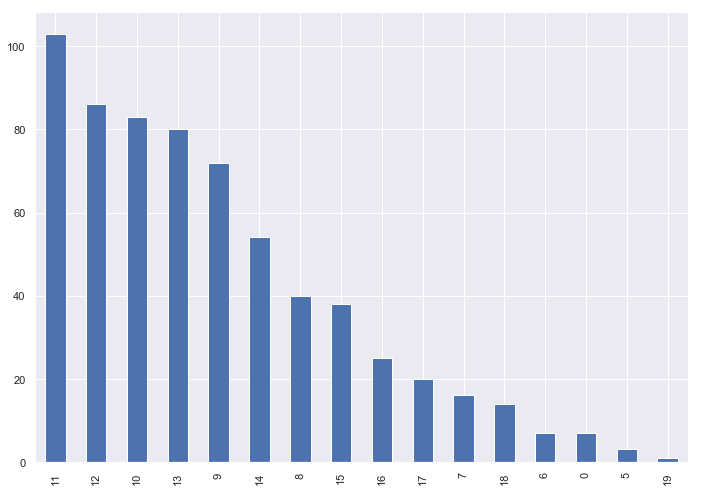

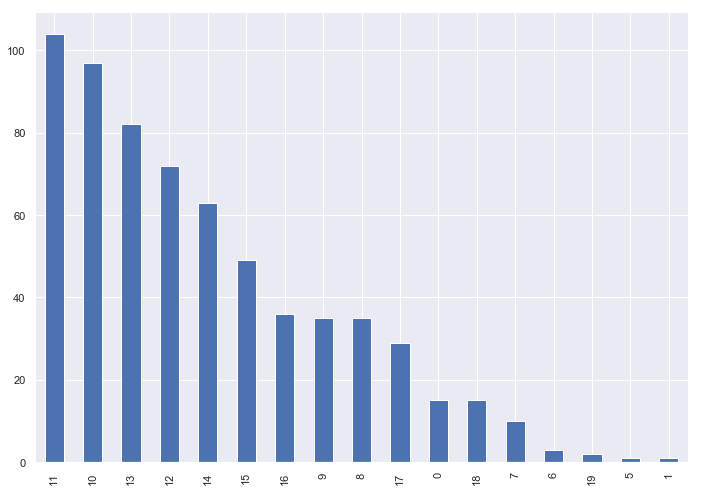

In [14]:
for i in range(df_por.shape[1]):
    df_por.iloc[:,i].value_counts().plot('bar')
    plt.show()

Text(0.5, 1.0, 'G3')

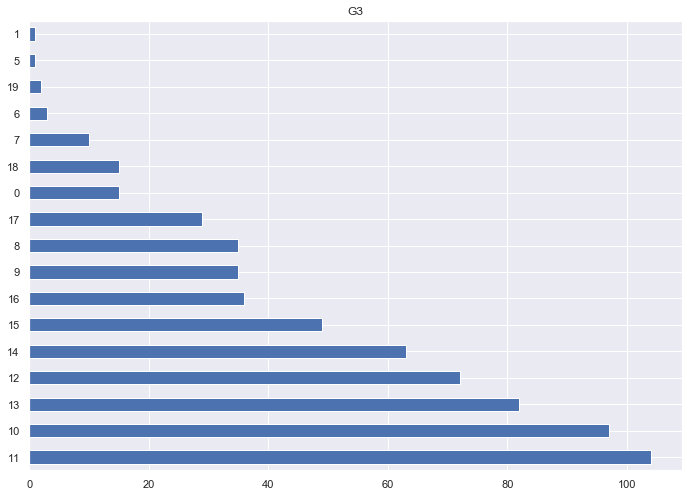

In [15]:
df_por.iloc[:,32].value_counts().plot('barh')
plt.title('G3')

https://etav.github.io/python/count_basic_freq_plot.html

### Univariant analysis
•	WoE, IV for each variable
•	Selection of most predictive variables
•	Coarse classing – grouping by WoE
•	Story telling – problem description


#### WoE, IV for each variable

In [16]:
# set a target variable
df_por['target'] = df_por['G3']
df=df_por.drop('G3',axis=1)

In [17]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,target
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [18]:
df['target'] = (df['target']>=10)
df['target'].value_counts()

True     549
False    100
Name: target, dtype: int64

In [19]:
a=(df['target']==0).value_counts()
round(a[1]/df['target'].value_counts().sum()*100,2)

15.41

In [20]:
df['target'] = df['target'].astype(int)
df['target'].value_counts()

1    549
0    100
Name: target, dtype: int64

In [21]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,target
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,1


In [22]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [23]:
final_iv, IV = data_vars(df,df.target)

In [24]:
final_iv.head()

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,school,GP,GP,423,391,0.924350,32,0.075650,0.712204,0.32,0.800043,0.651013
1,school,MS,MS,226,158,0.699115,68,0.300885,0.287796,0.68,-0.859841,0.651013
2,sex,F,F,383,333,0.869452,50,0.130548,0.606557,0.50,0.193191,0.046125
3,sex,M,M,266,216,0.812030,50,0.187970,0.393443,0.50,-0.239673,0.046125
4,age,15,16,289,255,0.882353,34,0.117647,0.464481,0.34,0.311975,0.095066


In [25]:
IV.head()

,VAR_NAME,IV
0,Dalc,0.081669
1,Fedu,0.162264
2,Fjob,0.036611
3,G1,2.183880
4,G2,2.558028


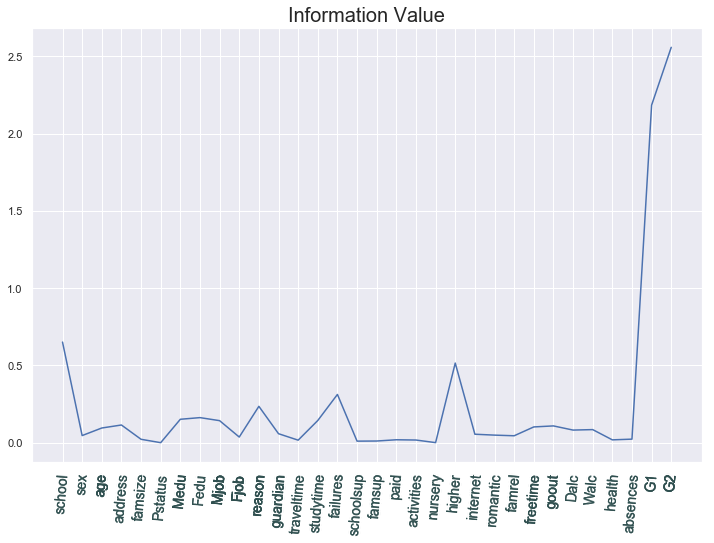

In [26]:
plt.figure(figsize=(12,8))
plt.plot(final_iv['VAR_NAME'], final_iv['IV'])
plt.title('Information Value', fontsize=20)
plt.xticks(final_iv['VAR_NAME'], rotation=85, fontsize=14, color='darkslategray' )
plt.show()

We see here that G1 and G2 attributes are highly correlated with the target variable and we should definitely exclude it from our predictive model because they can cause "over-predicting". School and Higher also have too high IV. For orientation, attributes with information value close to 0 do not have significant importance in relation with the target variable. 
- Less than 0.02	Not useful for prediction
- 0.02 to 0.1	Weak predictive Power
- 0.1 to 0.3	Medium predictive Power
- 0.3 to 0.5	Strong predictive Power
- more that 0.5	Suspicious Predictive Power

In [27]:
#plt.figure(figsize=(12,8))
#plt.bar(final_iv['VAR_NAME'],
          #  final_iv['IV'])
#plt.title('Information Value', fontsize=20)
#plt.xticks(final_iv['VAR_NAME'], rotation=85, fontsize=14, color='darkslategray' )
#plt.show()

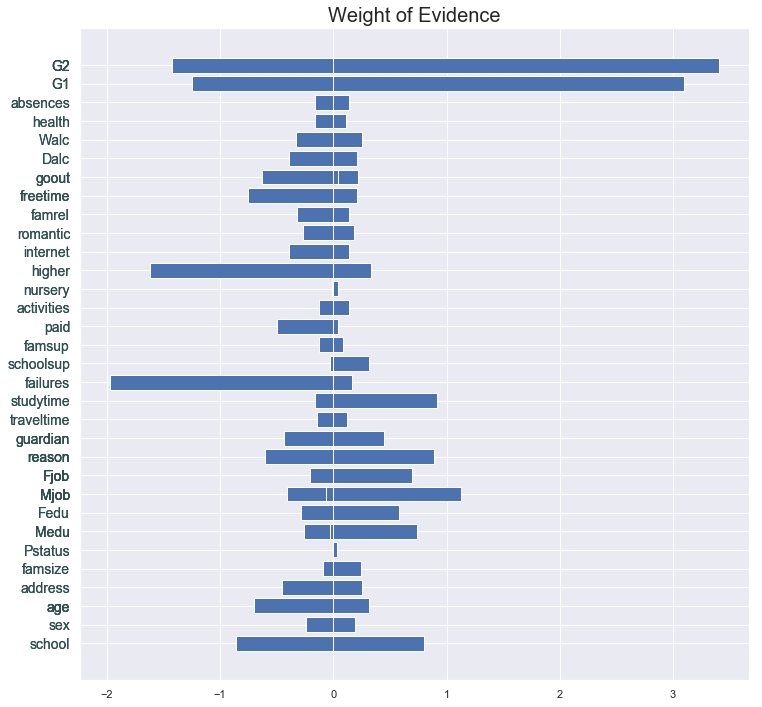

In [28]:
plt.figure(figsize=(12,12))
plt.barh(final_iv['VAR_NAME'],
            final_iv['WOE'])
plt.title('Weight of Evidence', fontsize=20)
plt.yticks(final_iv['VAR_NAME'], rotation=0, fontsize=14, color='darkslategray' )
plt.show()
# if woe is zero - skip it


In [29]:
IV.sort_values('IV',ascending=False).head(8)

,VAR_NAME,IV
4,G2,2.558028
3,G1,2.183880
27,school,0.651013
21,higher,0.515254
13,failures,0.312183
25,reason,0.235301
1,Fedu,0.162264
5,Medu,0.151555


In [30]:
final_iv.sort_values('WOE',ascending=False).head(8)

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
79,G2,12,13,166,165,0.993976,1,0.006024,0.300546,0.01,3.403017,2.558028
75,G1,11,13,245,243,0.991837,2,0.008163,0.442623,0.02,3.096986,2.183880
78,G2,11,11,103,102,0.990291,1,0.009709,0.185792,0.01,2.922045,2.558028
23,Mjob,teacher,teacher,72,68,0.944444,4,0.055556,0.123862,0.04,1.130285,0.142612
39,studytime,3,4,132,123,0.931818,9,0.068182,0.224044,0.09,0.912032,0.143612
32,reason,reputation,reputation,143,133,0.930070,10,0.069930,0.242259,0.10,0.884836,0.235301
0,school,GP,GP,423,391,0.924350,32,0.075650,0.712204,0.32,0.800043,0.651013
16,Medu,4,4,175,161,0.920000,14,0.080000,0.293260,0.14,0.739419,0.151555


The target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful 

####  Selection of most predictive variables

In [31]:
final_iv.query('0.3<= IV <= 0.5')

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
40,failures,0,1,619,536,0.865913,83,0.134087,0.976321,0.83,0.162365,0.312183
41,failures,2,3,30,13,0.433333,17,0.566667,0.023679,0.17,-1.971192,0.312183


We can see that there is only one attribute in a range 0.3-0.5. For prediction we need minimum two.

In [32]:
final_iv=final_iv.query('0.2<= IV <= 0.5')
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
29,reason,course,course,285,230,0.807018,55,0.192982,0.418944,0.55,-0.272182,0.235301
30,reason,home,home,149,132,0.885906,17,0.114094,0.240437,0.17,0.346660,0.235301
31,reason,other,other,72,54,0.750000,18,0.250000,0.098361,0.18,-0.604316,0.235301
32,reason,reputation,reputation,143,133,0.930070,10,0.069930,0.242259,0.10,0.884836,0.235301
40,failures,0,1,619,536,0.865913,83,0.134087,0.976321,0.83,0.162365,0.312183
41,failures,2,3,30,13,0.433333,17,0.566667,0.023679,0.17,-1.971192,0.312183


In [33]:
final_iv.query('0.1<= IV <= 0.5').iloc[:,0].unique()

array(['reason', 'failures'], dtype=object)

We can see that the attributes in a range 0.1-0.5  and in a range 0.2-0.5 of IV are the same. If we take the range of IV from 0.2 to 0.5 we get two independent variables for building a predictive model.

In [34]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'target'],
      dtype='object')

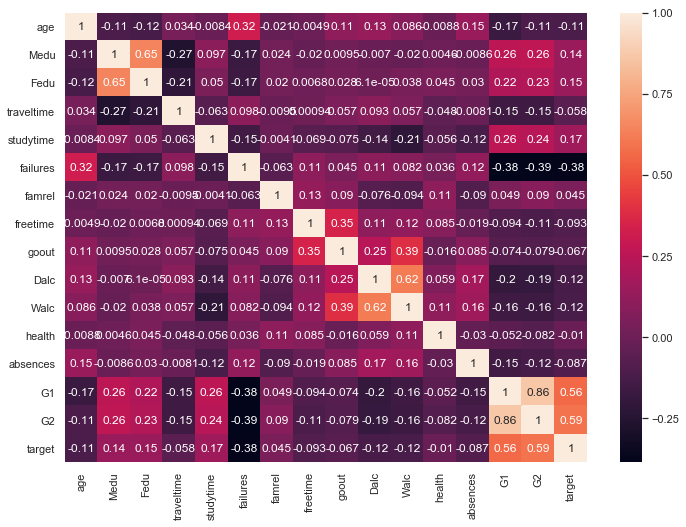

In [35]:
sns.heatmap(df.corr(), annot=True);

In [36]:
df_new=df.filter([ 'reason',
       'failures', 'target'])
df_new.head()

,reason,failures,target
0,course,0,1
1,course,0,1
2,other,0,1
3,home,0,1
4,home,0,1


In [37]:
df_new.reason.unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [38]:
df_new.failures.unique()

array([0, 3, 1, 2], dtype=int64)

In [39]:
df_new.shape

(649, 3)

### Preparation for predictive model
•	Correlation calculation
•	Variable reduction
•	Dummy variable creation


#### Correlation

In [40]:
df_new.corr()

,failures,target
failures,1.000000,-0.380237
target,-0.380237,1.000000


### Dummy variables

In [41]:
dummy_reason=pd.get_dummies(df_new['reason'])
dummy_reason.columns = ['reason_course', 'reason_home', 'reason_other', 'reason_reputation']
dummy_reason.head()

,reason_course,reason_home,reason_other,reason_reputation
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [42]:
df_new_with_dummy=df_new.merge(dummy_reason, left_index=True, right_index=True)
df_new_with_dummy.head()

,reason,failures,target,reason_course,reason_home,reason_other,reason_reputation
0,course,0,1,1,0,0,0
1,course,0,1,1,0,0,0
2,other,0,1,0,0,1,0
3,home,0,1,0,1,0,0
4,home,0,1,0,1,0,0


In [43]:
df_ready=df_new_with_dummy.iloc[:,1:]
df_ready.head()

,failures,target,reason_course,reason_home,reason_other,reason_reputation
0,0,1,1,0,0,0
1,0,1,1,0,0,0
2,0,1,0,0,1,0
3,0,1,0,1,0,0
4,0,1,0,1,0,0


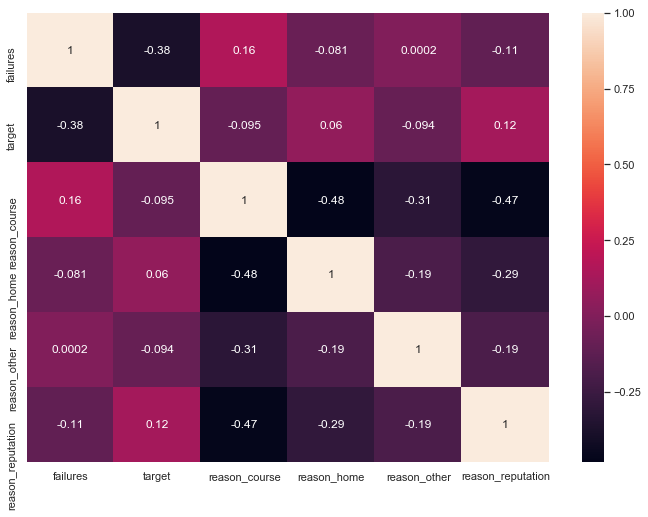

In [44]:
sns.heatmap(df_ready.corr(), annot=True);

In [45]:
dummy_failures=pd.get_dummies(df_new['failures'])
dummy_failures.columns = ['failures_0', 'failures_1', 'failures_2', 'failures_3']
dummy_failures.head()

,failures_0,failures_1,failures_2,failures_3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [46]:
df_new_with_dummy2=df_new_with_dummy.merge(dummy_failures, left_index=True, right_index=True)
df_new_with_dummy2.head()

,reason,failures,target,reason_course,reason_home,reason_other,reason_reputation,failures_0,failures_1,failures_2,failures_3
0,course,0,1,1,0,0,0,1,0,0,0
1,course,0,1,1,0,0,0,1,0,0,0
2,other,0,1,0,0,1,0,1,0,0,0
3,home,0,1,0,1,0,0,1,0,0,0
4,home,0,1,0,1,0,0,1,0,0,0


In [47]:
df_ready2=df_new_with_dummy2.iloc[:,2:]
df_ready2.head()

,target,reason_course,reason_home,reason_other,reason_reputation,failures_0,failures_1,failures_2,failures_3
0,1,1,0,0,0,1,0,0,0
1,1,1,0,0,0,1,0,0,0
2,1,0,0,1,0,1,0,0,0
3,1,0,1,0,0,1,0,0,0
4,1,0,1,0,0,1,0,0,0


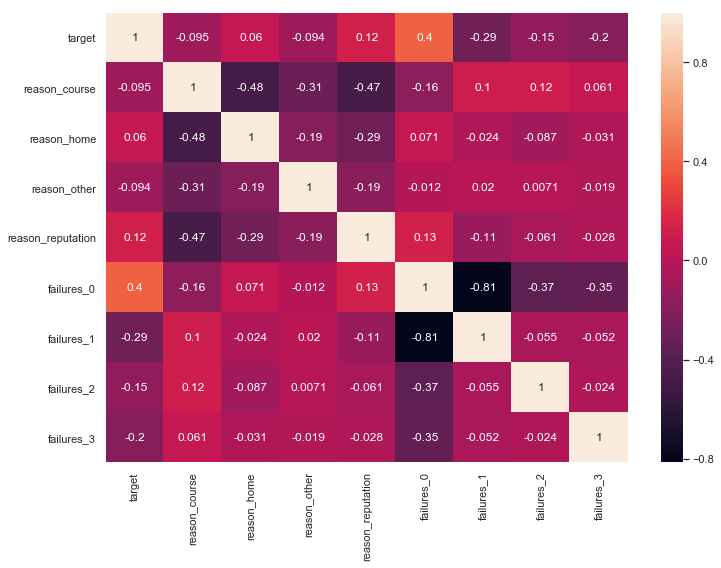

In [48]:
sns.heatmap(df_ready2.corr(), annot=True);

### Model development 
•	Logistic regression
•	Probability calculation based on logistic regression


### Logistic Regression

#### split data into train and test

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [51]:
X=df_ready.filter([  'failures','reason_course',
       'reason_home', 'reason_other', 'reason_reputation'])
y=df_ready.target

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=2)

In [53]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
predictions

C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [54]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.8846153846153846


In [57]:
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision:", metrics.precision_score(y_test, predictions))
print("Recall:", metrics.recall_score(y_test, predictions))


Accuracy: 0.8846153846153846
Precision: 0.88
Recall: 1.0


### confusion matrix 

In [56]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[  5  15]
 [  0 110]]


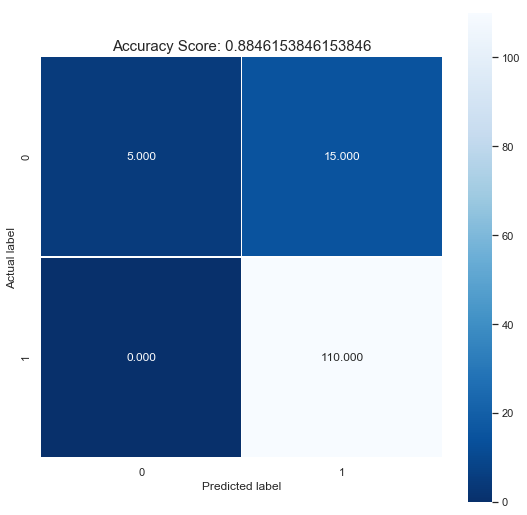

In [59]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

The confusion matrix in the form of the array object. 
The dimension of this matrix is 2*2 because this model is binary classification (two classes 0 and 1). 
Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions.
In the output, 110 and 5 are actual predictions, and 15 are incorrect predictions. 

True positive rate = TP/actual yes

In [60]:
from sklearn.metrics import roc_curve, auc

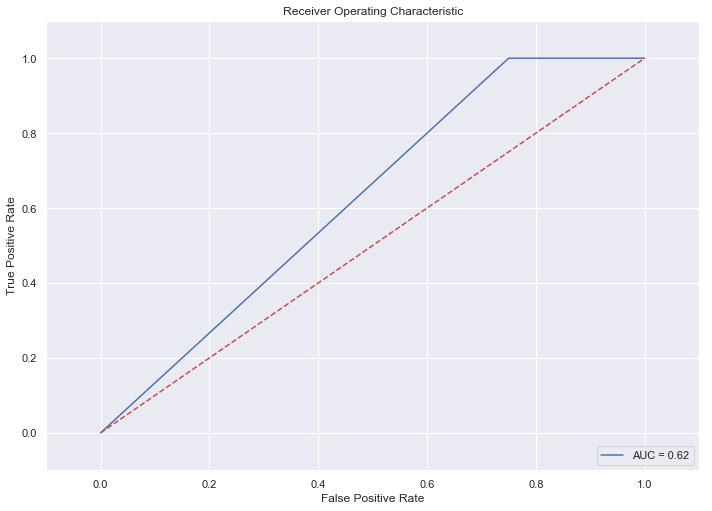

In [61]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUC (area under the curve) score is 0.62 which shows that the classification model performance is quite weak. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

So summing up and comparing two data sets with students grades from math and portugese subjects we can conclude that, assuming both classed are held by the same school/institution, better representation of failure would be 0 grades and representaion of pass would be any mark higher than 0. The assumption would be that the grades in range from 0 to 20 can be grouped and aligned with our european grading school system from 1 to 5. So 0 would be equal to fail. 1-5 would be equal to 2, 6-10 = 3, 11-15 = 4, 16-20 = 5.   